# linear regression

In [17]:
import pandas as pd 
import numpy as np

In [18]:
data=pd.read_csv("Boston House Price Data.csv")


In [19]:
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [20]:
pip install scikit-learn numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [22]:
print(type(data))  # Should print: <class 'pandas.core.frame.DataFrame'>

print(data.head(10)) 

<class 'pandas.core.frame.DataFrame'>
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     1

In [23]:
print(data.info())       # Check columns, datatypes, non-null counts
print(data.describe())   # Summary statistics
print(data.isnull().sum())  # Missing values count per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

In [24]:
X = data.drop(columns=["PRICE"])  # Features: all columns except PRICE
y = data["PRICE"]                 # Target: PRICE column


In [25]:
X = X.fillna(X.mean())


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 22.796534653465343
Coefficients: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [31]:
y_pred = model.predict(X_test)


In [32]:
results=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
print(results)

     Actual  predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880
..      ...        ...
412    17.9  -0.164237
436     9.6  13.684867
411    17.2  16.183597
86     22.5  22.276220
75     21.4  24.479024

[102 rows x 2 columns]


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Also needed for np.sqrt()


In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


Root Mean Squared Error (RMSE): 4.929
R^2 Score: 0.669


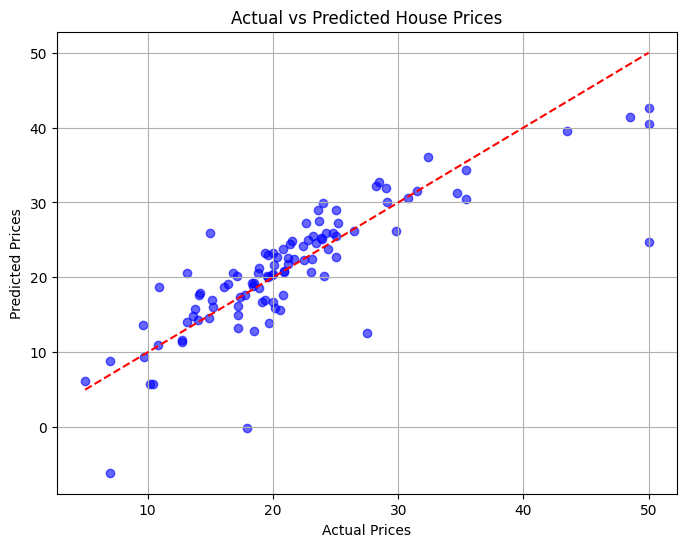

In [35]:
import matplotlib.pyplot as plt

# Scatter plot: Actual prices vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


Model Evaluation Results:
Mean Absolute Error (MAE): 3.189
Mean Squared Error (MSE): 24.291
Root Mean Squared Error (RMSE): 4.929
R² Score: 0.669
Mean Absolute Percentage Error (MAPE): 16.87%


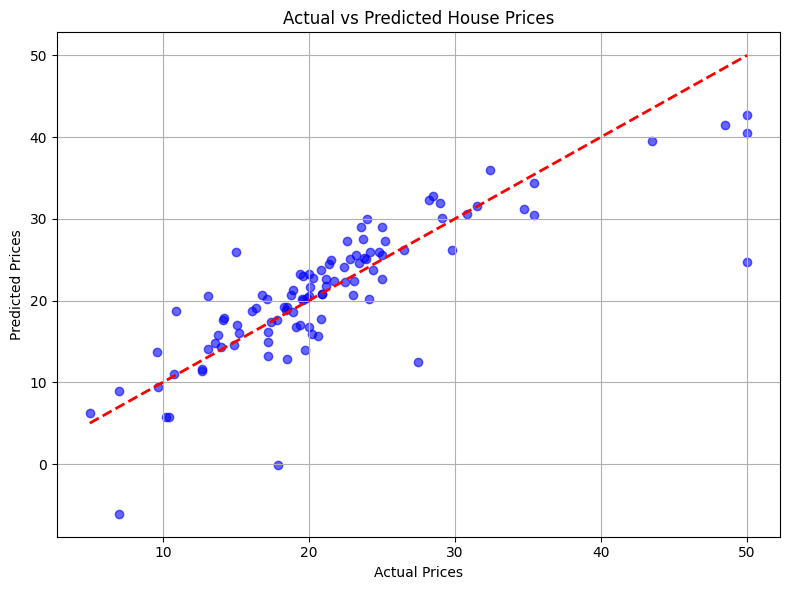

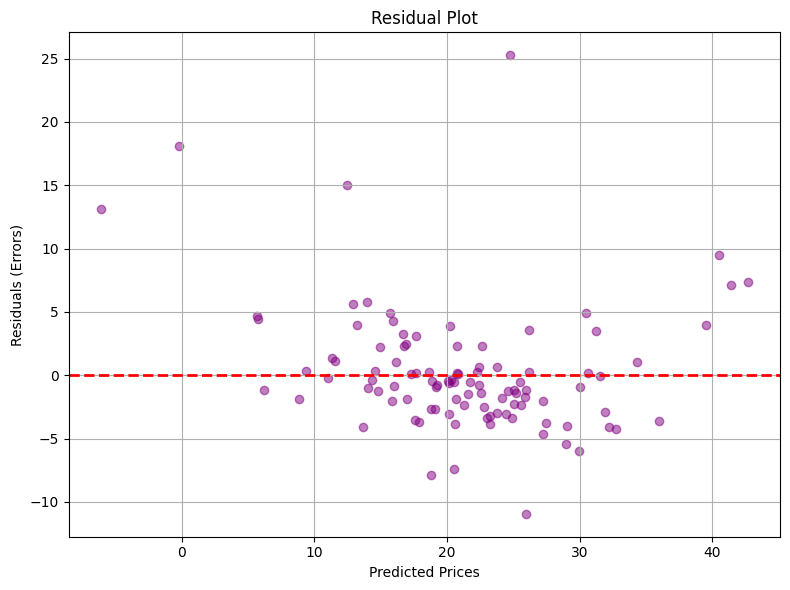

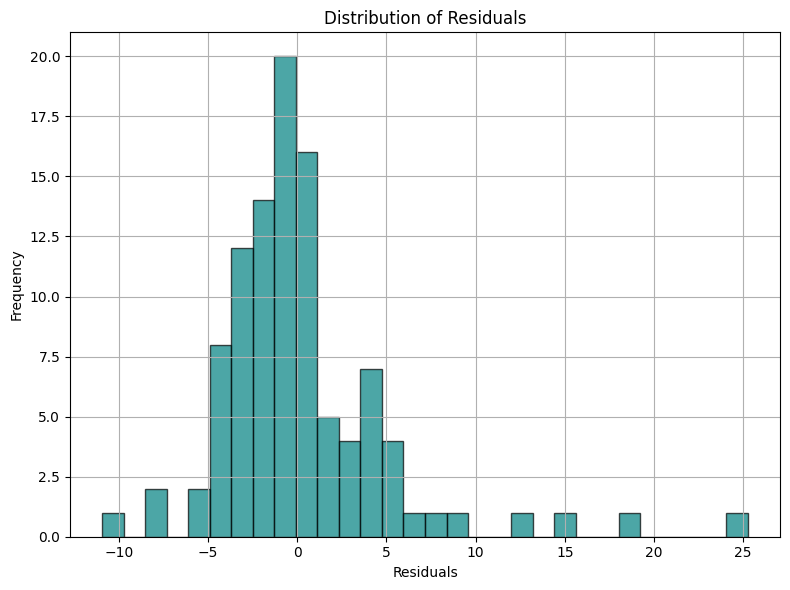

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

# Make predictions
y_pred = model.predict(X_test)

# === 1. Evaluation Metrics ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# === 2. Print the results ===
print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# === 3. Scatter Plot: Actual vs Predicted ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 4. Residuals Plot (errors) ===
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. Histogram of Residuals ===
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import pickle


In [38]:
# Save the model to a file
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully to house_price_model.pkl")


Model saved successfully to house_price_model.pkl


In [39]:
# Load the model from the file
with open("house_price_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Predict again using the loaded model
y_loaded_pred = loaded_model.predict(X_test)

# Compare predictions
print("Are predictions from loaded model same as original?")
print(np.allclose(y_pred, y_loaded_pred))  # Should print: True


Are predictions from loaded model same as original?
True


In [40]:
r2_loaded = r2_score(y_test, y_loaded_pred)
print(f"R² Score from loaded model: {r2_loaded:.3f}")


R² Score from loaded model: 0.669


In [41]:
import pandas as pd

# List of feature names used in training
feature_names = X.columns  # Make sure you store this during training

# Dummy data as a DataFrame with the same feature names
dummy_df = pd.DataFrame([[0.03, 0.00, 2.18, 0, 0.458, 6.998, 45.2, 3.5, 3, 222.0, 18.7, 396.90, 4.98]],
                        columns=feature_names)

# Transform using the scaler
dummy_scaled = scaler.transform(dummy_df)

# Predict using the loaded model
prediction = loaded_model.predict(dummy_scaled)
print(f"Predicted House Price: ${prediction[0]:.2f}")


Predicted House Price: $31.84
